<a href="https://colab.research.google.com/github/jorgenriquez/Inteligencia_artificial/blob/main/modelos_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

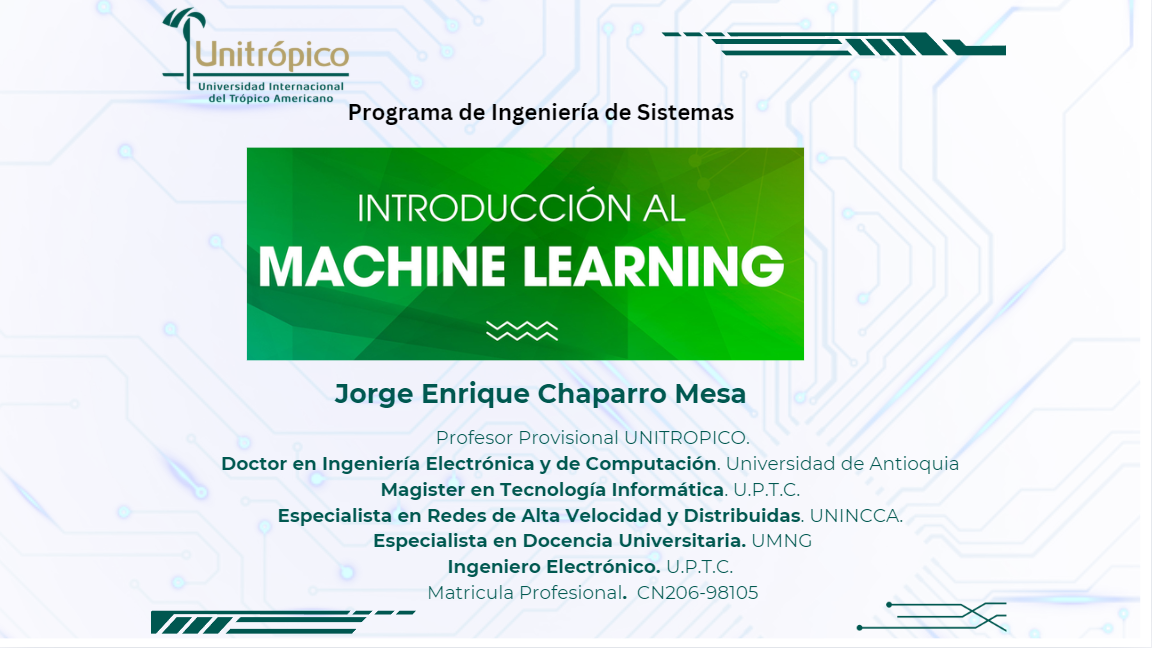

# **Ejercicio Completo de Arendizaje automático para Regresión**

Este cuaderno muestra de forma detallada los pasos para desarrollar modelos de regresión en aprendizaje automático. Se describe el flujo de trabajo general y se implementan distintos algoritmos de regresión sobre un conjunto de datos sintético con 20 variables predictoras y una variable respuesta continua.

El flujo de trabajo se basa en las etapas destacadas en el diagrama proporcionado: análisis del negocio, adquisición y preprocesamiento de datos, exploración y selección de características, división del conjunto de datos, entrenamiento y validación de modelos, ajuste de hiperparámetros, evaluación y despliegue.

Se trabaja todo el documento haciendo uso de laslibrerias de **scikit-learn**. Toda la informacion en detalle asi como el codigo utilizado en este Notebook se encuentra en el sitio oficial de **scikit-learn**  https://scikit-learn.org/stable/index.html

Tambien se usa informacion de apoyo de los siguientes sitios:

https://interactivechaos.com/es/manual/tutorial-de-machine-learning/la-clase-onehotencoder

https://joanby.github.io/bookdown-mlaz/index.html

## **Flujo de trabajo general**

1. **Análisis del negocio**: definir el problema y los objetivos, identificar la variable objetivo y las variables que pueden influir en ella.
2. **Adquisición de datos**: obtener datos relevantes (bases de datos, archivos locales, APIs, sensores).
3. **Preprocesamiento de datos**: limpieza (imputación de valores faltantes, eliminación de duplicados), codificación de variables categóricas, normalización o estandarización.
4. **Exploración y análisis de datos**: visualización, estadísticas descriptivas e identificación de patrones y correlaciones.
5. **Selección de características**: eliminar características redundantes y aplicar métodos de selección.
6. **División de datos**: separar el conjunto en variables independientes (X) y dependiente (y); generar conjuntos de entrenamiento, validación y prueba.
7. **Entrenamiento del modelo**: ajustar diferentes algoritmos de aprendizaje automático.
8. **Validación y ajuste de hiperparámetros**: utilizar métricas de rendimiento (R², MSE, RMSE) y técnicas de búsqueda (grid search, random search) para optimizar parámetros.
9. **Evaluación del modelo**: evaluar el rendimiento en datos no vistos.
10. **Despliegue**: integrar el modelo en una aplicación o servicio (fuera del alcance de este cuaderno).

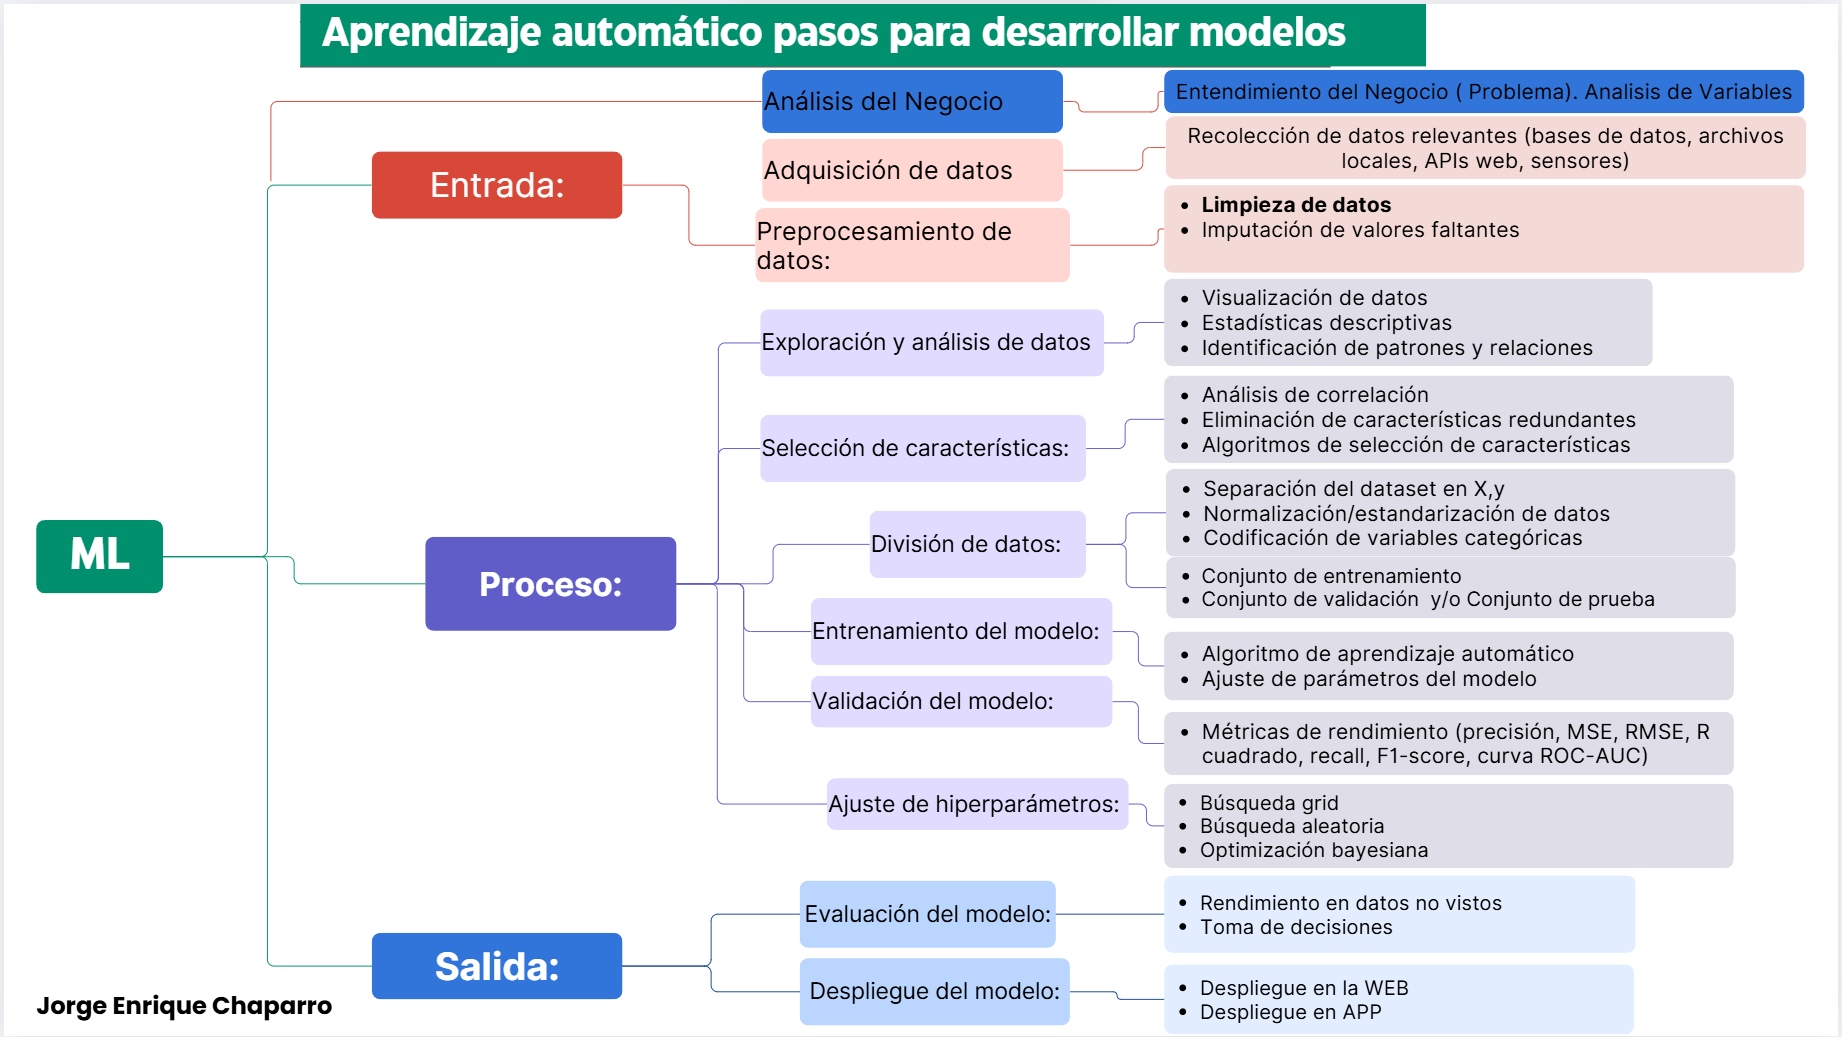

## **Dataset de ejemplo**

Se generará un conjunto de datos sintético mediante la función `make_regression` de `scikit‑learn`. Este dataset consta de 1000 observaciones, 20 variables predictoras y una variable respuesta continua. Aunque los datos son artificiales, permiten ilustrar de manera realista la construcción de modelos de regresión.

Las variables se denominan `feature_0`, `feature_1`, …, `feature_19` y la variable respuesta se denomina `target`.

In [91]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generar datos numéricos
X_numeric, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
columnas_num = [f"feature_{i}" for i in range(X_numeric.shape[1])]

df = pd.DataFrame(X_numeric, columns=columnas_num)
df['target'] = y

# Crear variable categórica a partir de feature_0
df['cat_feature_1'] = pd.cut(df['feature_0'], bins=3, labels=['bajo', 'medio', 'alto'])

# Crear variable categórica aleatoria
df['cat_feature_2'] = np.random.choice(['A', 'B', 'C'], size=df.shape[0])

# Crear variable categórica basada en cuartiles de feature_1
df['cat_feature_3'] = pd.qcut(df['feature_1'], q=4, labels=['Q1','Q2','Q3','Q4'])

# Mostrar algunas filas del dataset
print('Dimensiones del dataset con variables categóricas:', df.shape)
df.head()


Dimensiones del dataset con variables categóricas: (1000, 24)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target,cat_feature_1,cat_feature_2,cat_feature_3
0,0.225842,1.551378,-0.107347,0.859695,-0.942963,-1.096625,-1.197167,-1.733767,-0.950042,1.274060,...,-1.525106,1.011097,1.478184,-1.351547,0.364602,0.133166,2.887328,medio,C,Q4
1,0.110836,-1.454615,0.263888,-1.654510,0.818549,0.482849,0.358334,-0.061366,0.327626,1.270846,...,0.872090,-0.987858,1.744496,-1.426464,-0.604514,-0.166242,-254.379865,medio,B,Q1
2,0.458600,-0.081280,-0.698474,0.737528,0.860085,0.275249,0.333945,-1.076817,0.947821,-0.181406,...,-1.383018,-0.836187,0.606730,0.908223,0.511415,-2.093178,188.854342,medio,C,Q2
3,-1.795643,-0.453414,-0.423760,0.155325,0.487775,0.398147,0.732829,2.042178,0.733548,1.598322,...,0.008784,-0.141530,-2.104750,-0.330090,-0.511764,-0.237683,-179.585447,bajo,C,Q2
4,-1.180626,0.339530,0.328010,-0.224555,0.963951,-1.058450,0.941256,0.968745,-0.002686,0.042907,...,-0.518436,0.269235,-0.668149,-1.044086,0.482665,-0.579855,-48.078873,medio,A,Q3


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   feature_0      1000 non-null   float64 
 1   feature_1      1000 non-null   float64 
 2   feature_2      1000 non-null   float64 
 3   feature_3      1000 non-null   float64 
 4   feature_4      1000 non-null   float64 
 5   feature_5      1000 non-null   float64 
 6   feature_6      1000 non-null   float64 
 7   feature_7      1000 non-null   float64 
 8   feature_8      1000 non-null   float64 
 9   feature_9      1000 non-null   float64 
 10  feature_10     1000 non-null   float64 
 11  feature_11     1000 non-null   float64 
 12  feature_12     1000 non-null   float64 
 13  feature_13     1000 non-null   float64 
 14  feature_14     1000 non-null   float64 
 15  feature_15     1000 non-null   float64 
 16  feature_16     1000 non-null   float64 
 17  feature_17     1000 non-null   flo

## Identificar columnas categóricas y numéricas

In [93]:
# Identificar columnas categóricas y numéricas
categorical_cols = ['cat_feature_1', 'cat_feature_2', 'cat_feature_3']
numeric_cols = [col for col in df.columns if col not in categorical_cols + ['target']]

## Explorar variables numéricas: estadísticas descriptivas

In [94]:
# Explorar variables numéricas: estadísticas descriptivas
print("Estadísticas descriptivas de variables numéricas:")
display(df[numeric_cols].describe())

Estadísticas descriptivas de variables numéricas:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.076667,0.013539,0.032622,0.003376,-0.008915,0.015544,0.054075,0.004950,0.039394,0.011173,0.011749,-0.005270,-0.035079,-0.006954,-0.001288,0.031884,0.059952,0.027774,0.004833,-0.062712
std,1.009778,0.952066,1.014809,1.017669,0.997669,0.950731,1.013661,1.014536,1.023988,1.024155,1.030090,1.006971,1.003274,0.991788,0.987680,0.968005,1.038570,0.992521,1.010895,0.989027
min,-3.635200,-3.329504,-3.836656,-3.307900,-3.033989,-3.176704,-3.138515,-3.601085,-3.688365,-3.922400,-3.170426,-3.094289,-3.856375,-3.321115,-3.334893,-2.757854,-2.911804,-2.966753,-3.232565,-2.993707
25%,-0.760600,-0.587153,-0.609316,-0.662581,-0.682224,-0.617974,-0.649690,-0.706585,-0.661353,-0.696539,-0.683737,-0.663437,-0.703580,-0.679386,-0.679981,-0.595726,-0.629663,-0.643161,-0.651600,-0.767580
50%,-0.087050,-0.027852,0.043134,0.009513,-0.009753,0.021267,0.062630,-0.019474,0.033484,-0.009998,0.025255,0.011754,-0.071583,-0.003722,0.022868,0.021439,0.042206,0.034711,0.014585,-0.065310
75%,0.626192,0.597489,0.714922,0.668792,0.664804,0.652977,0.746288,0.708905,0.713115,0.727884,0.737680,0.689565,0.682633,0.626746,0.637962,0.686099,0.783025,0.699524,0.651299,0.603815
max,3.152057,2.985259,3.071337,3.377768,2.890643,2.783235,3.287761,3.137749,3.942331,3.076860,3.428910,3.377383,2.824220,3.285724,3.140423,3.852731,3.243093,4.479084,3.926238,2.969510


## Histogramas de variables numéricas

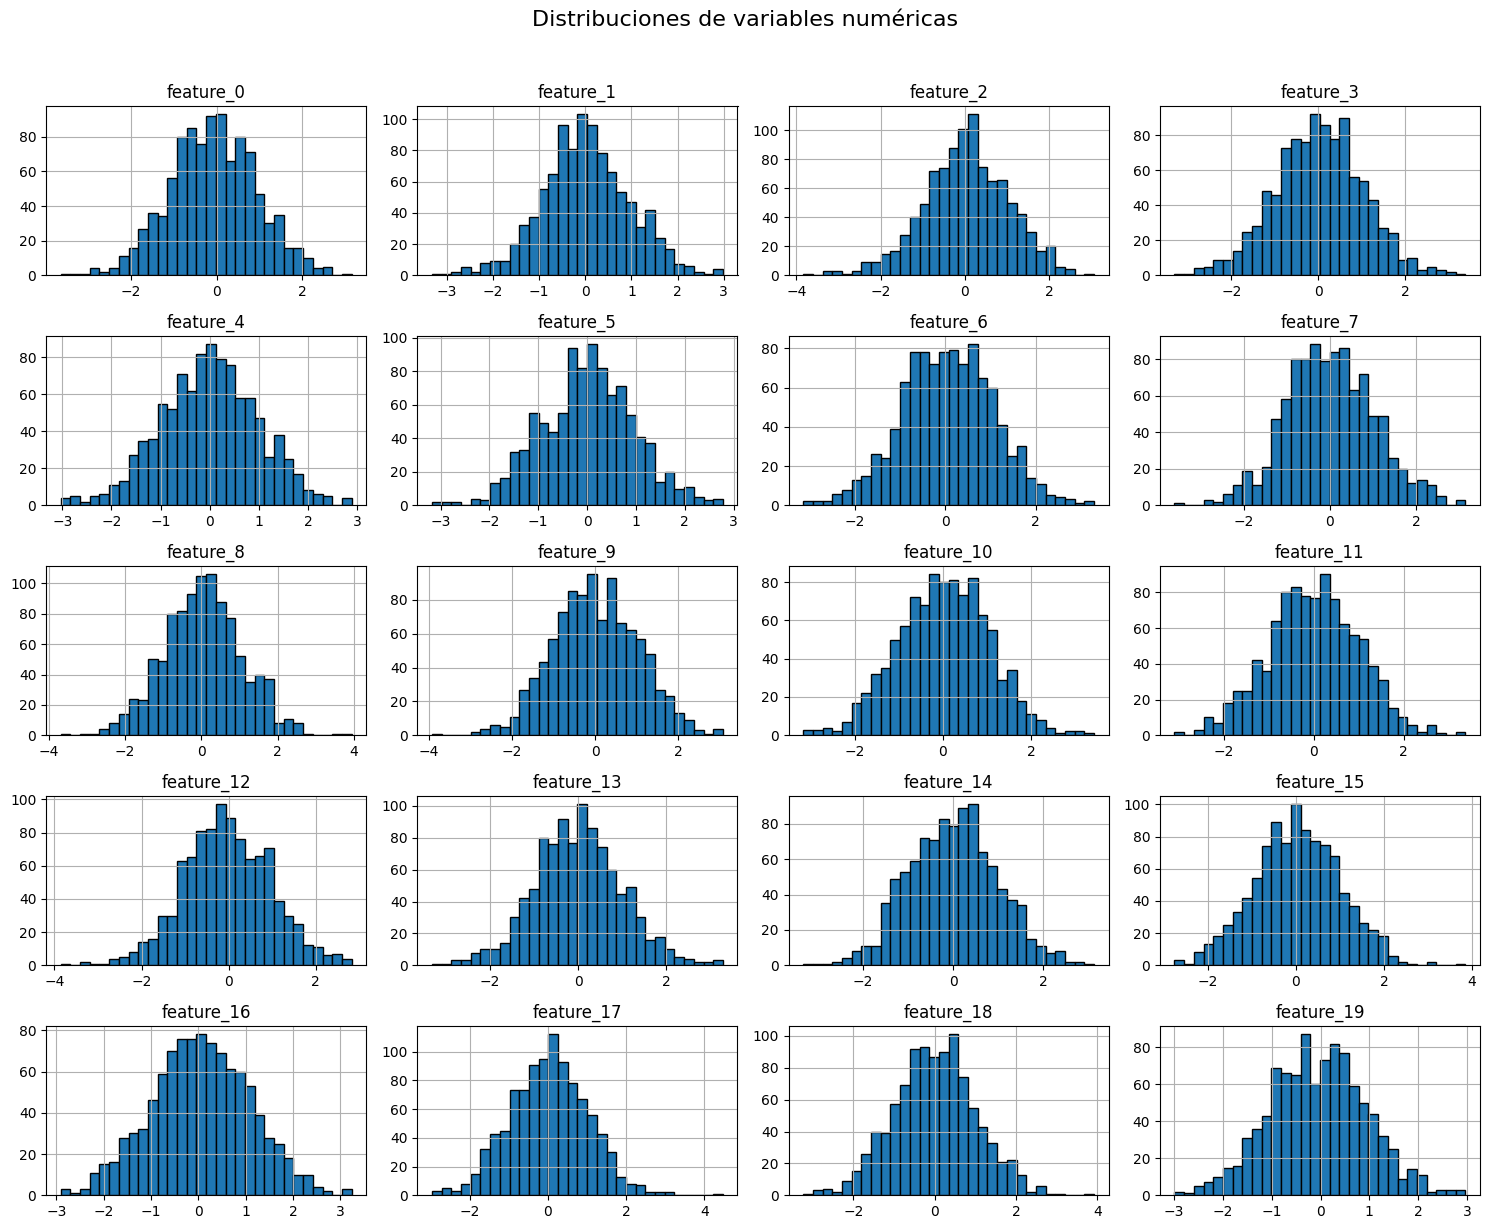

In [95]:
# Histograma de cada variable numérica
import matplotlib.pyplot as plt
import seaborn as sns
df[numeric_cols].hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribuciones de variables numéricas', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Boxplots de algunas variables numéricas para detectar outliers (puedes ajustar el número de columnas)

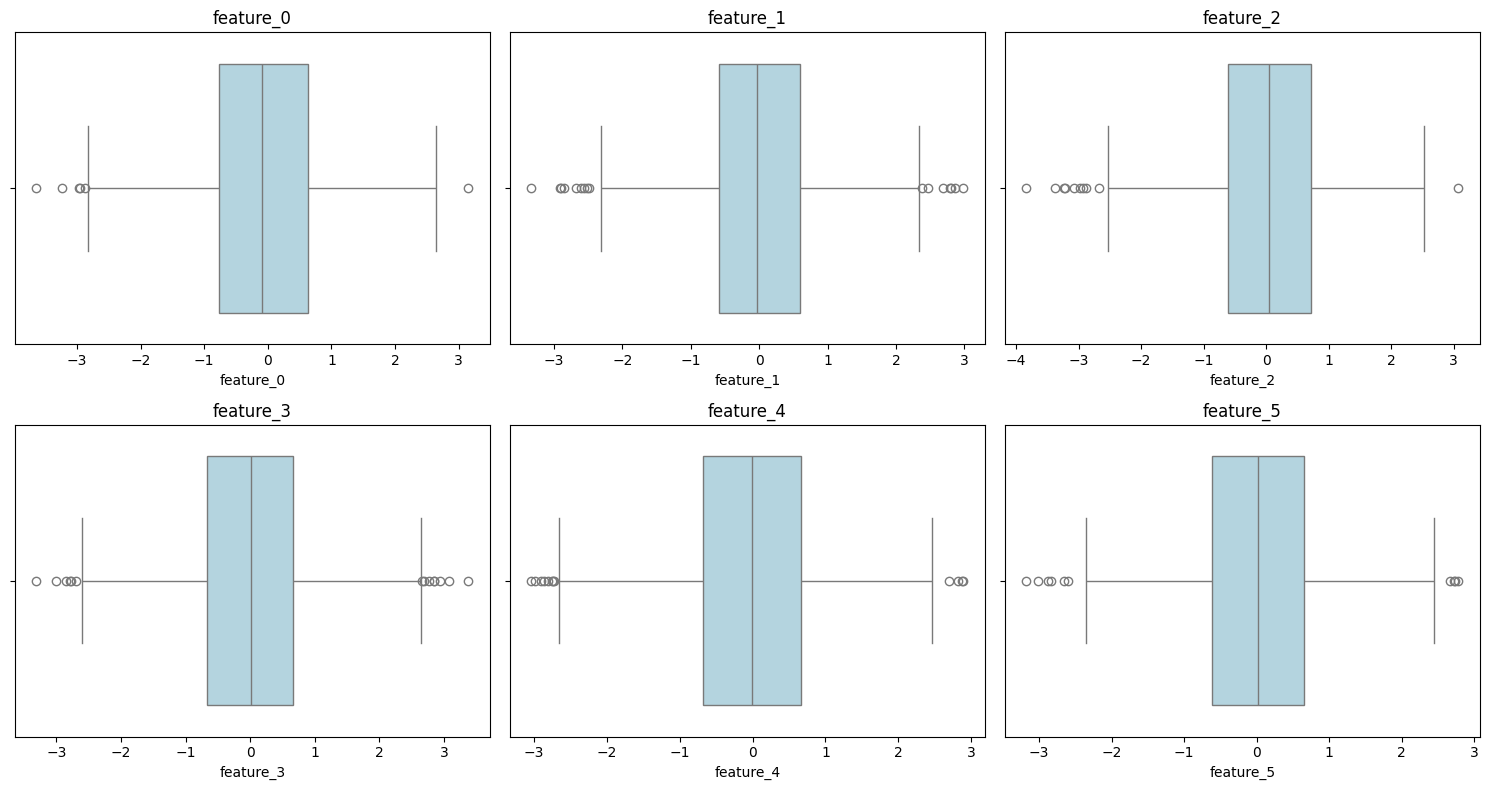

In [96]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[:6]):  # ajusta [:6] según cuántas quieras visualizar
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

## Matriz de correlación de variables numéricas

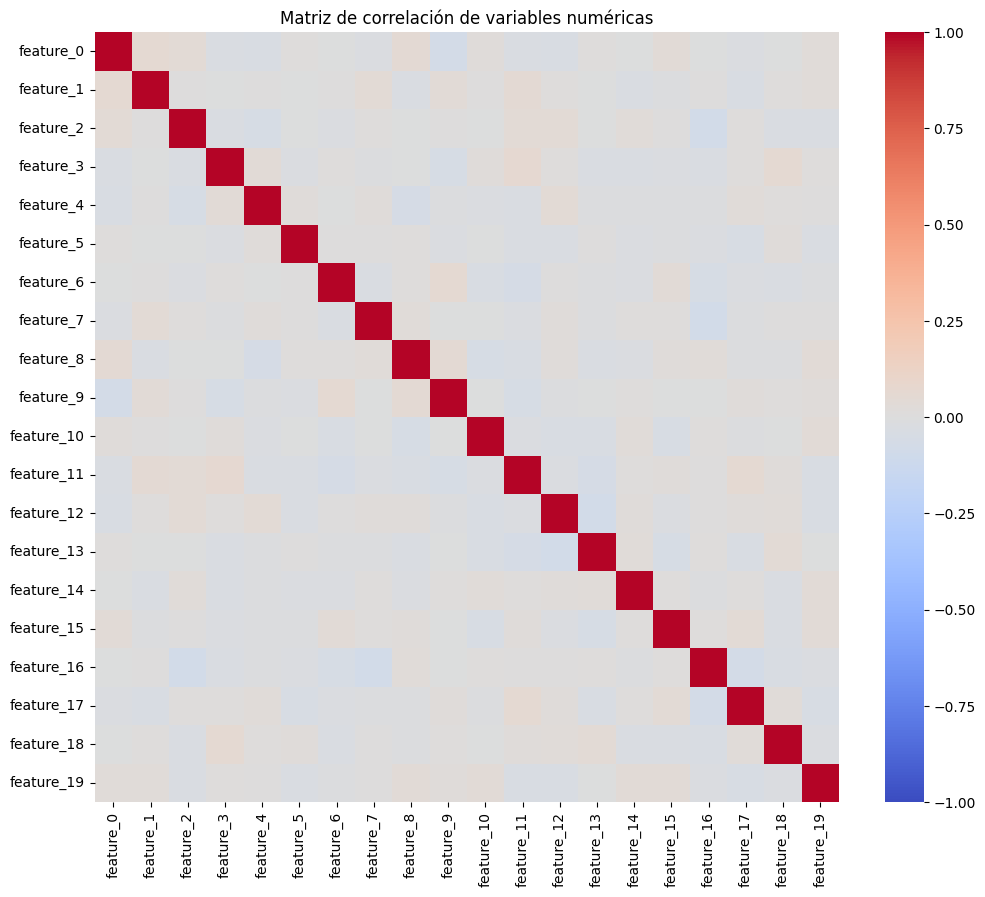

In [97]:
# Matriz de correlación de variables numéricas
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de correlación de variables numéricas')
plt.show()

## **Distribución de las variables categóricas**

/tmp/ipython-input-1296805026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


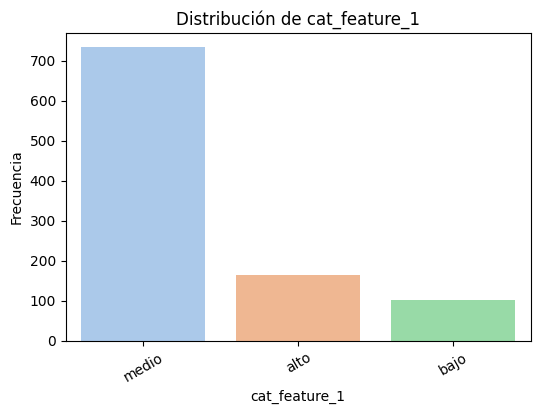

/tmp/ipython-input-1296805026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


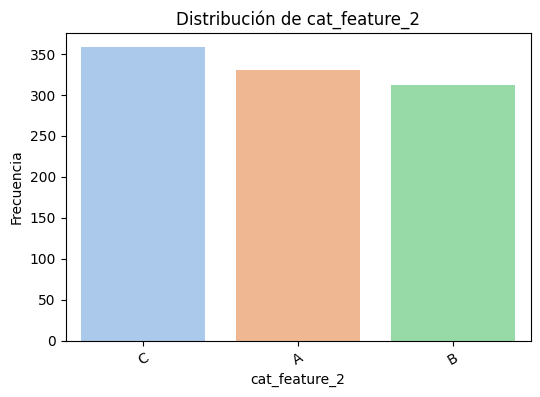

/tmp/ipython-input-1296805026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')


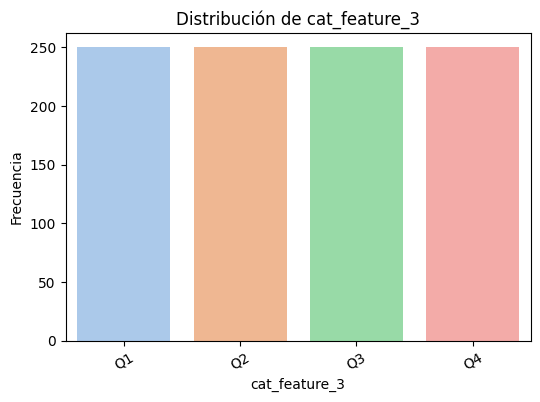

In [98]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=30)
    plt.show()

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{nombre_modelo} - R^2: {r2:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    # Grafico Predicción vs Real
    plt.figure(figsize=(6,4))
    plt.scatter(range(len(y_true)), y_true, color='red', marker='o', label='Valor real', s=15)
    plt.scatter(range(len(y_pred)), y_pred, color='blue', marker='o', label='Valor predicho', s=15)
    plt.title(f'Predicción vs Valor real ({nombre_modelo})')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Target')
    plt.legend()
    plt.grid(True)
    plt.show()


## **Cálculo del factor de inflación de la varianza (VIF) para detectar multicolinealidad**

En el análisis de regresión, la multicolinealidad se produce cuando las variables independientes están correlacionadas entre sí. Esto dificulta la determinación de la influencia única de cada predictor sobre la variable dependiente. Como resultado, tienes errores estándar inflados, lo que a su vez afecta a la significación de los coeficientes.

El factor de inflación de la varianza (VIF) es una gran herramienta para detectar la multicolinealidad, ya que ofrece información que va más allá de las simples correlaciones por pares.

Desarrollado por el estadístico Cuthbert Daniel, el VIF es una herramienta de diagnóstico muy utilizada en el análisis de regresión para detectar la multicolinealidad, que se sabe que afecta a la estabilidad e interpretabilidad de los coeficientes de regresión. Más técnicamente, el VIF funciona cuantificando cuánto se infla la varianza de un coeficiente de regresión debido a las correlaciones entre los predictores.

Todo esto es importante porque estas correlaciones dificultan el aislamiento del efecto único de cada predictor sobre la variable objetivo, lo que conduce a estimaciones del modelo menos fiables. También debo decir que, para contar realmente la historia correcta, el VIF siempre se calcula para cada predictor de un modelo.

**Interpretación de los valores VIF**

Cómo interpretar los valores VIF para comprender el nivel de multicolinealidad:

**VIF = 1:** Esto indica que no hay multicolinealidad. El predictor no está correlacionado con otros predictores, por lo que no infla el error típico ni afecta a la estabilidad del modelo.

**VIF entre 1 y 5:** Esto sugiere una multicolinealidad moderada. Existe cierta correlación con otros predictores, pero no suele ser grave. Sin embargo, merece la pena vigilar estos predictores para ver si la multicolinealidad se convierte en un problema, sobre todo si otros valores VIF son altos.

**VIF > 5:** Existe una alta multicolinealidad. El error típico del predictor puede estar notablemente inflado, lo que puede hacer que su coeficiente sea menos fiable. Considera la posibilidad de tomar medidas para reducir la multicolinealidad, como eliminar o combinar los predictores correlacionados.

**VIF > 10:** Esto indica una multicolinealidad grave. El error típico del predictor está muy inflado y la estimación de su coeficiente es probablemente inestable. Suelen ser necesarias acciones correctoras, como eliminar el predictor o utilizar técnicas de regularización.  https://www.datacamp.com/es/tutorial/variance-inflation-factor

In [100]:
# Cálculo del factor de inflación de la varianza (VIF) para detectar multicolinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_num = df[numeric_cols].values
vif_data = pd.DataFrame({
    'feature': numeric_cols,
    'VIF': [variance_inflation_factor(X_num, i) for i in range(X_num.shape[1])]
})
print("VIF por variable numérica:")
display(vif_data.sort_values(by='VIF', ascending=False))

VIF por variable numérica:


,feature,VIF
11,feature_11,1.029138
16,feature_16,1.026992
9,feature_9,1.022565
0,feature_0,1.021955
13,feature_13,1.021233
17,feature_17,1.020796
12,feature_12,1.019735
8,feature_8,1.019085
2,feature_2,1.018465
3,feature_3,1.017235


### **Pairplot de un subconjunto de variables numéricas**

Un pairplot es una herramienta gráfica que muestra simultáneamente las distribuciones univariadas de cada variable y las relaciones bivariadas entre pares de variables. Al seleccionar un subconjunto de variables numéricas y generar un pairplot:

En la diagonal se visualizan las distribuciones individuales (histogramas o densidades) de cada variable, lo que permite evaluar su forma y detectar asimetrías u outliers.

Fuera de la diagonal se dibujan gráficos de dispersión para cada par de variables, que ayudan a identificar patrones de relación, tendencias lineales o no lineales y posibles correlaciones.

Esta visualización es especialmente útil como análisis exploratorio temprano, porque facilita comprender cómo se comportan las variables entre sí y si existen dependencias que puedan influir en el modelado. Para datasets con muchas variables, se suele seleccionar un subconjunto representativo para evitar una visualización excesivamente cargada.

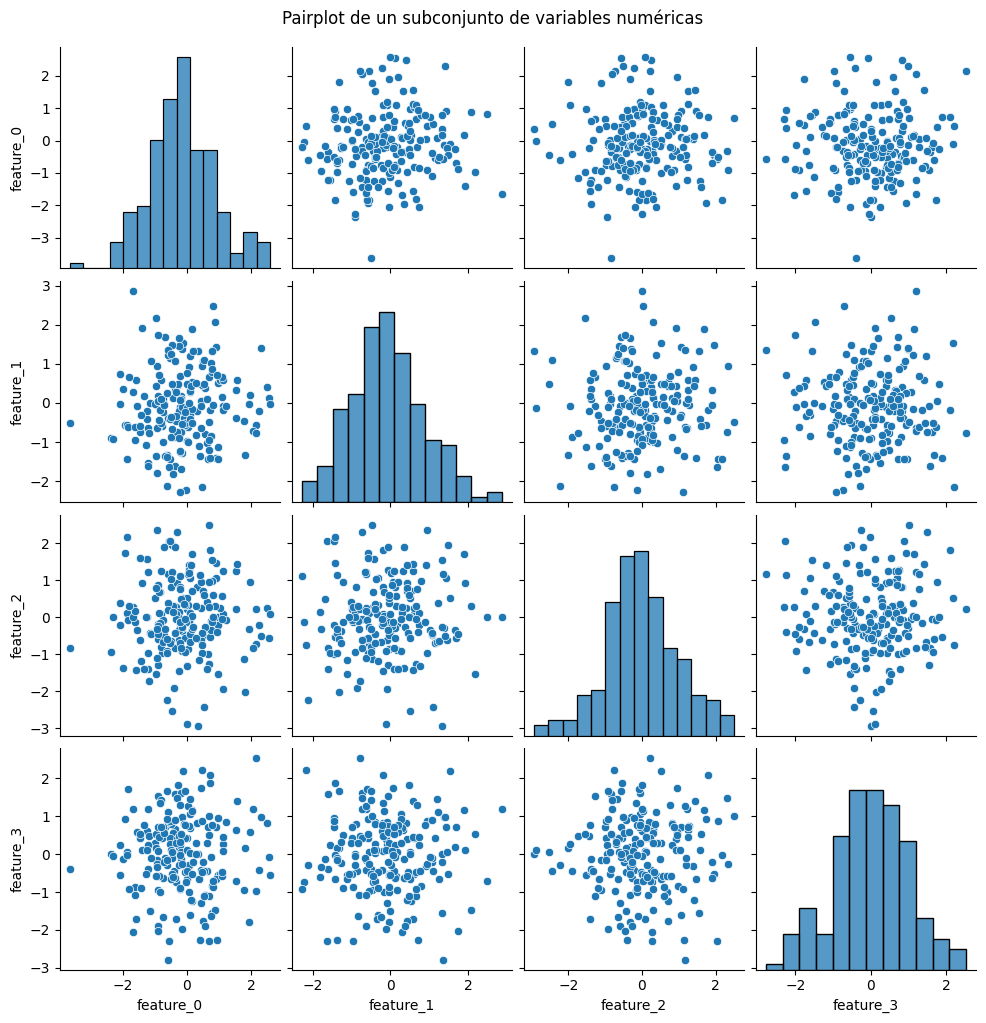

In [101]:
# Pairplot de un subconjunto de variables numéricas
# Muestra relaciones bivariadas y distribuciones

subset_cols = numeric_cols[:4]  # selecciona las 4 primeras variables o las que consideres relevantes
sns.pairplot(df[subset_cols].sample(200), diag_kind='hist')
plt.suptitle('Pairplot de un subconjunto de variables numéricas', y=1.02)
plt.show()


# **Separar variables independientes y dependiente**

In [127]:
# Separar variables independientes y dependiente
X = df.drop('target', axis=1)
y = df['target']


### **Calcular la correlación de cada predictor numérico con la variable respuesta**

En Machine Learning, calcular la correlación de cada predictor numérico con la variable respuesta y cumple varios objetivos clave durante la etapa de análisis exploratorio y selección de características:

**1. Identificar relaciones lineales directas**

*   La correlación de Pearson mide la intensidad y dirección de la relación lineal entre dos variables.

*   Un valor cercano a 1 indica una fuerte correlación positiva (cuando x sube, y también).

*   Un valor cercano a -1 indica una fuerte correlación negativa (cuando x sube, y baja).

*   
Valores cercanos a 0 indican poca o ninguna relación lineal.



En modelos lineales (como Regresión Lineal, Ridge, Lasso), esta información ayuda a priorizar predictores que pueden aportar más capacidad explicativa.

**2. Reducir dimensionalidad eliminando variables poco útiles**



*   Si una variable tiene correlación muy baja con la respuesta, probablemente aporte poco valor predictivo y se puede considerar eliminarla para simplificar el modelo.
*   Esto ayuda a reducir el ruido y mejorar la interpretabilidad.

3. Evitar multicolinealidad en modelos sensibles

Aunque la correlación con la respuesta es el foco, este análisis suele ir acompañado de la revisión de correlación entre predictores para evitar multicolinealidad, que puede distorsionar los coeficientes en modelos lineales.

**4. Guiar la ingeniería de características**

*   Si encontramos que un predictor no tiene relación lineal significativa pero sí no lineal, podríamos aplicar transformaciones (log, polinómicas, etc.).

*   Esto permite capturar relaciones complejas en modelos que lo requieran.

**5. Priorización para modelos explicativos**

*   En problemas donde interesa interpretar el modelo (por ejemplo, en estudios científicos o financieros), los predictores con mayor correlación con la respuesta son candidatos iniciales para un análisis más profundo.



Correlación de cada variable predictora con la variable respuesta:
feature_1     0.502815
feature_17    0.441584
feature_4     0.433081
feature_0     0.421351
feature_6     0.338613
feature_11    0.213264
feature_15    0.167712
feature_10    0.072942
feature_2     0.033265
feature_3     0.026160
feature_18    0.009545
feature_12    0.006777
feature_7     0.004368
feature_19    0.002767
feature_9     0.000532
feature_5    -0.010584
feature_14   -0.010709
feature_13   -0.025394
feature_8    -0.031365
feature_16   -0.053354
Name: target, dtype: float64


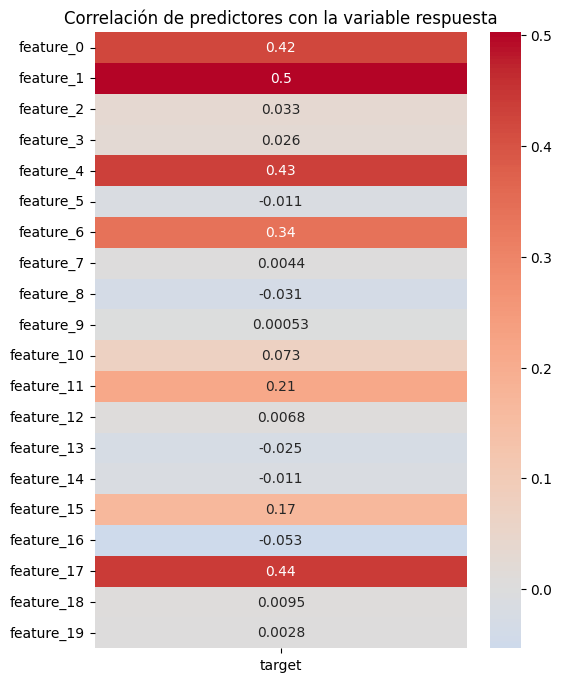

In [128]:
X_num = X.select_dtypes(include=['number'])

correlaciones = pd.concat([X_num, y], axis=1).corr(method='pearson')['target'].drop('target')
print("Correlación de cada variable predictora con la variable respuesta:")
print(correlaciones.sort_values(ascending=False))

# Visualizar correlaciones con un mapa de calor
plt.figure(figsize=(6, len(correlaciones) * 0.4))
sns.heatmap(correlaciones.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de predictores con la variable respuesta')
plt.show()

/tmp/ipython-input-1780000053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones_ordenadas, y=correlaciones_ordenadas.index, palette='coolwarm')


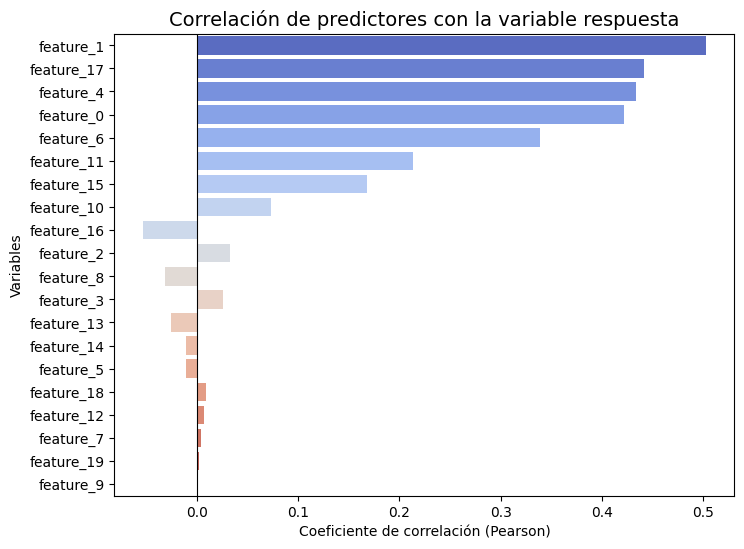

In [129]:
# Ordenar correlaciones por valor absoluto
correlaciones_ordenadas = correlaciones.reindex(correlaciones.abs().sort_values(ascending=False).index)

plt.figure(figsize=(8,6))
sns.barplot(x=correlaciones_ordenadas, y=correlaciones_ordenadas.index, palette='coolwarm')
plt.title('Correlación de predictores con la variable respuesta', fontsize=14)
plt.xlabel('Coeficiente de correlación (Pearson)')
plt.ylabel('Variables')
plt.axvline(0, color='black', linewidth=0.8)
plt.show()

## Identificar columnas numéricas y categóricas

In [122]:
# Identificar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object','category']).columns


# **Dividir en conjuntos de entrenamiento y prueba**

En *Machine Learning*, la división de un conjunto de datos en **entrenamiento** y **prueba** es un paso fundamental para evaluar la capacidad de generalización de un modelo.

## Definición
Según Géron (2022) en *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*:

> "Separar los datos en un conjunto de entrenamiento y uno de prueba permite que el modelo se entrene en un subconjunto y se evalúe en otro independiente, lo que proporciona una estimación imparcial del error de generalización."

## Finalidad
- **Entrenamiento**: El modelo aprende patrones y relaciones a partir de un subconjunto de datos.
- **Prueba**: Se reserva un subconjunto independiente para medir el rendimiento en datos no vistos.

Bishop (2006) en *Pattern Recognition and Machine Learning* menciona:

> "La evaluación del rendimiento debe realizarse sobre datos no utilizados en el ajuste de los parámetros, para obtener una estimación no sesgada del error de generalización."

## Prevención del sobreajuste
Goodfellow, Bengio y Courville (2016) en *Deep Learning* señalan:

> "Si se evalúa el modelo con los mismos datos usados para el entrenamiento, la estimación del rendimiento puede ser demasiado optimista debido al sobreajuste."

## Ejemplo en Python
```python
from sklearn.model_selection import train_test_split

# División 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## **Definir transformadores**

Los transformadores (transformers) en machine learning son un tipo de arquitectura de red neuronal diseñada para procesar datos secuenciales, especialmente en tareas donde es importante entender el contexto y las relaciones a largo plazo dentro de una secuencia, como en el procesamiento del lenguaje natural (NLP). Su función principal es transformar una secuencia de entrada en una secuencia de salida, aprendiendo cómo distintas partes de la secuencia están relacionadas entre sí.

Esta arquitectura utiliza un mecanismo llamado autoatención (self-attention), que permite al modelo considerar todas las posiciones de la secuencia simultáneamente para identificar cuáles partes de la información son más relevantes unas con otras. Esto mejora significativamente la capacidad de los modelos para retener contexto y manejar dependencias a largo plazo, superando limitaciones de modelos anteriores como RNNs o LSTMs que procesaban la información de forma secuencial y podían olvidar contextos lejanos.

El uso de transformadores ha revolucionado el campo del machine learning porque:

*  Permiten entrenar modelos a gran escala de forma más eficiente gracias a la computación paralela.

*  Facilitan la personalización rápida mediante técnicas como transfer learning y fine-tuning en datos específicos.

*  Soportan modelos multimodales que integran distintos tipos de datos, como texto e imágenes.

*  Han impulsado avances en aplicaciones como traducción automática, generación de texto, análisis de secuencias genéticas, reconocimiento de voz, visión por computadora, y más.

### **Preprocesadores - OneHotEncoder, StandardScaler**

El sklearn.preprocessingpaquete proporciona varias funciones de utilidad comunes y clases de transformadores para cambiar los vectores de características sin procesar en una representación que sea más adecuada para los estimadores posteriores.

En general, muchos algoritmos de aprendizaje, como los modelos lineales, se benefician de la estandarización del conjunto de datos (véase " Importancia del escalado de características" ). Si existen valores atípicos en el conjunto, los escaladores robustos u otros transformadores pueden ser más apropiados. El comportamiento de los diferentes escaladores, transformadores y normalizadores en un conjunto de datos con valores atípicos marginales se describe en " Comparar el efecto de diferentes escaladores en datos con valores atípicos".
https://scikit-learn.org/stable/modules/preprocessing.html

## **OneHotEncoder**

**OneHotEncoder**.  La codificación one-hot es un método de conversión de variables categóricas en un formato que se puede proporcionar a los algoritmos de aprendizaje automático para mejorar la predicción. Consiste en crear nuevas columnas binarias para cada categoría única de una característica. Cada columna representa una categoría única, y un valor de 1 o 0 indica la presencia o ausencia de esa categoría.

Veamos un ejemplo para ilustrar cómo funciona la codificación de un solo golpe. Supongamos que tenemos un conjunto de datos con una única característica categórica, Color, que puede tomar tres valores: Red, Green, y Blue. Utilizando la codificación de un solo golpe, podemos transformar esta característica de la siguiente manera:

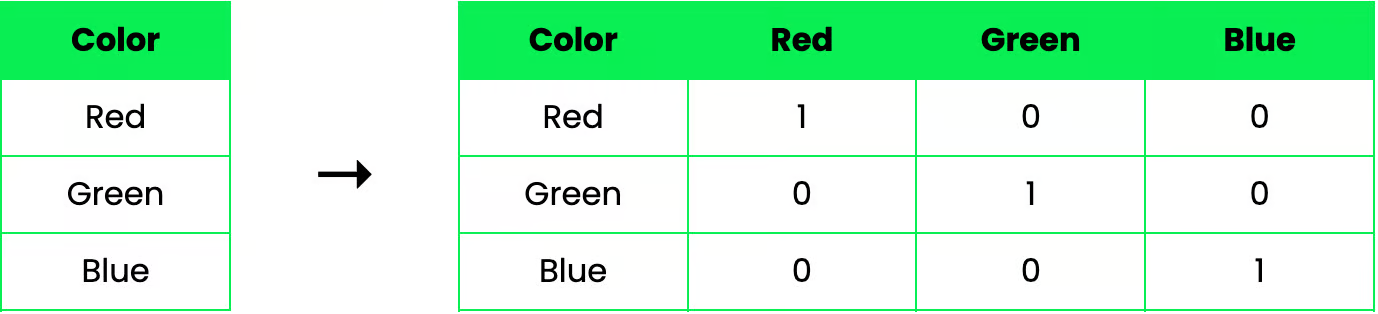





 https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

**¿Por qué utilizar la codificación One-Hot?**

La codificación One-Hot es una técnica esencial en el preprocesamiento de datos por varias razones. Transforma los datos categóricos en un formato que los modelos de aprendizaje automático puedan comprender y utilizar fácilmente. Esta transformación permite tratar cada categoría de forma independiente, sin implicar falsas relaciones entre ellas.

Además, muchas bibliotecas de procesamiento de datos y aprendizaje automático admiten la codificación de un solo golpe. Se adapta sin problemas al flujo de trabajo de preprocesamiento de datos, facilitando la preparación de conjuntos de datos para diversos algoritmos de aprendizaje automático.

## **StandardScaler**

### **¿Qué es la estandarización?**

La estandarización es un método de preparación de datos que implica ajustar la entrada (características) centrándolas primero (restando la media de cada punto de datos) y luego dividiéndolas por la desviación estándar, lo que da como resultado que los datos tengan una media de 0 y una desviación estándar de 1.

La fórmula de estandarización se puede escribir de la siguiente manera:

valor_estandarizado = (valor_de_entrada – media) / desviación_estándar
Supongamos que tiene una media de 10,4 y una desviación estándar de 4. Para estandarizar el valor de 15,9 , introduzca los valores dados en la ecuación de la siguiente manera:

**valor_estandarizado = (15.9 – 10.4) / 4**
**valor_estandarizado = ( 5.5 ) / 4**
**valor_estandarizado = 1.37**
**StandardScaler** destaca como una herramienta ampliamente utilizada para implementar la estandarización de datos.

**StandardScaler**  proporcionada por Scikit Learn aplica la estandarización en la variable de entrada (características), asegurándose de que tengan una media de aproximadamente 0 y una desviación estándar de aproximadamente 1 .

Ajusta los datos para tener una distribución estandarizada, haciéndolos adecuados para el modelado y garantizando que ninguna característica individual influya desproporcionadamente en el algoritmo debido a diferencias en la escala.

## **Pipeline**

En scikit-learn, un Pipeline es una herramienta que permite encadenar, en un único objeto, todo el flujo de preprocesamiento y modelado.
La idea es que cada paso se ejecute en orden, y que cuando llames a .fit() o .predict() se apliquen todos los pasos previos automáticamente.

### **¿Qué problema resuelve?**

*  Evita fugas de datos (data leakage) porque asegura que el ajuste de escaladores, codificadores, etc. se haga solo con los datos de entrenamiento.

*  Hace que el código sea más limpio y reproducible.

*  Permite que el mismo flujo funcione igual para entrenamiento, validación y predicción de nuevos datos.

*  Facilita la validación cruzada (cross_val_score, GridSearchCV) sin que tengas que repetir el preprocesamiento manualmente.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [131]:
# === 4) Preprocesador ===
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ]
)

In [132]:
# === 5) Generar datasets procesados (solo si quieres usarlos explícitamente) ===
X_train_processed = preprocessor.fit_transform(X_train)  # fit SOLO con train
X_test_processed  = preprocessor.transform(X_test)

print("Formas:", X_train_processed.shape, X_test_processed.shape)


Formas: (800, 30) (200, 30)


In [134]:
import scipy.sparse as sp
# (Opcional) ver X_train_processed como DataFrame para la clase
all_feat_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_processed.toarray() if sp.issparse(X_train_processed) else X_train_processed,
                          columns=all_feat_names, index=X_train.index)
display(X_train_df.head())

,num__feature_0,num__feature_1,num__feature_2,num__feature_3,num__feature_4,num__feature_5,num__feature_6,num__feature_7,num__feature_8,num__feature_9,...,cat__cat_feature_1_alto,cat__cat_feature_1_bajo,cat__cat_feature_1_medio,cat__cat_feature_2_A,cat__cat_feature_2_B,cat__cat_feature_2_C,cat__cat_feature_3_Q1,cat__cat_feature_3_Q2,cat__cat_feature_3_Q3,cat__cat_feature_3_Q4
29,-0.915625,0.534085,0.019756,0.029650,-0.059600,0.732605,0.051150,-0.329293,-0.191076,1.823635,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
535,-0.559700,-1.472718,-0.962473,-0.157214,0.540548,-0.799715,0.884418,-0.845632,0.702742,0.754977,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
695,-2.817364,-0.718795,-0.123685,0.694990,0.180324,0.339665,0.650707,-0.994038,-0.405488,1.034686,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
557,0.780080,-0.174034,0.121905,0.261169,0.532305,0.333004,-0.828691,-0.264788,2.394667,0.350477,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
836,0.355436,-0.096701,0.918566,-0.884741,0.812201,1.042799,0.830833,0.093133,0.273560,1.893614,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### 1. Modelo 1: Regresión Lineal


La **regresión lineal** es una técnica estadística clásica utilizada para modelar la relación entre una variable dependiente continua y un conjunto de variables independientes. La forma general del modelo lineal múltiple es:

y = β₀ + β₁x₁ + β₂x₂ + … + βₙxₙ + ε

donde `β` son los coeficientes que se estiman minimizando el error cuadrático medio (MSE). Se asume una relación lineal entre predictores y respuesta, independencia de los errores y homocedasticidad.

En esta sección se entrena un modelo de regresión lineal utilizando los datos estandarizados y se evalúa su rendimiento mediante R², MSE y RMSE. Se incluye además un gráfico de los valores reales frente a los predichos.

Regresión Lineal -> R2: 1.000000 | MSE: 0.011475 | RMSE: 0.107119 | MAE: 0.084627


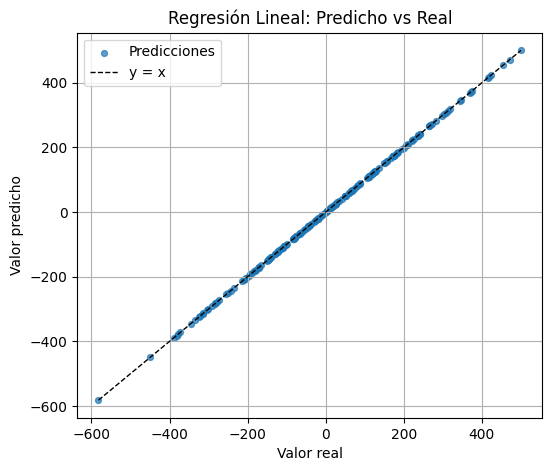

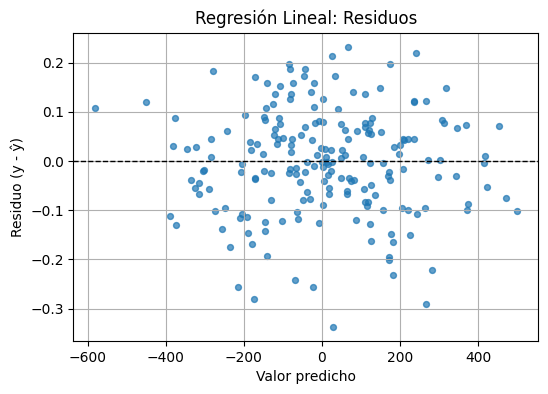

In [135]:
# === 6) Modelo 1: Regresión Lineal (usando los procesados) ===
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)
y_pred_lr = lr_model.predict(X_test_processed)

def evaluar_modelo(y_true, y_pred, nombre='Modelo'):
    r2   = r2_score(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    print(f"{nombre} -> R2: {r2:.6f} | MSE: {mse:.6f} | RMSE: {rmse:.6f} | MAE: {mae:.6f}")

    # Predicho vs Real con línea y=x
    plt.figure(figsize=(6,5))
    plt.scatter(y_true, y_pred, s=18, alpha=0.7, label='Predicciones')
    m = min(y_true.min(), y_pred.min())
    M = max(y_true.max(), y_pred.max())
    plt.plot([m, M], [m, M], 'k--', lw=1, label='y = x')
    plt.xlabel('Valor real'); plt.ylabel('Valor predicho')
    plt.title(f'{nombre}: Predicho vs Real')
    plt.legend(); plt.grid(True); plt.show()

    # Residuos
    resid = y_true - y_pred
    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, resid, s=18, alpha=0.7)
    plt.axhline(0, color='k', ls='--', lw=1)
    plt.xlabel('Valor predicho'); plt.ylabel('Residuo (y - ŷ)')
    plt.title(f'{nombre}: Residuos')
    plt.grid(True); plt.show()

evaluar_modelo(y_test, y_pred_lr, 'Regresión Lineal')

# **Validacion Cruzada**

In [136]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe_lr, X, y, scoring='r2', cv=cv)
print("CV R2 (5 folds):", scores, " | media:", scores.mean())


CV R2 (5 folds): [0.9999997  0.99999974 0.99999974 0.99999969 0.9999997 ]  | media: 0.9999997135565796


### 2. Modelo 2: Árbol de Decision


Un **árbol de regresión** es un modelo no paramétrico que divide recursivamente el espacio de características en regiones que minimizan la varianza de la variable respuesta. Cada división se basa en el valor de una característica y conduce a un conjunto de nodos hoja donde la predicción es la media de los valores de `y` en ese nodo.

Un árbol de decisión es una herramienta visual y un algoritmo utilizado para la toma de decisiones y la predicción, muy común en campos como la inteligencia artificial, el aprendizaje automático (Machine Learning), la estadística y la analítica de datos. Se representa gráficamente como una estructura en forma de árbol, donde:

*  El nodo raíz representa la decisión inicial o el punto de partida.

*  Las ramas emergen del nodo raíz y representan las diferentes acciones o condiciones posibles.

*  Los nodos internos (o de decisión) representan puntos donde se evalúan condiciones o características.

*  Los nodos hoja o terminales representan los resultados finales o las posibles consecuencias de la secuencia de decisiones.

Los árboles de decisión pueden usarse para tareas de clasificación (asignar una etiqueta o categoría a datos) o regresión (predecir valores numéricos). Funcionan con una estrategia de "divide y vencerás", dividiendo recursivamente el conjunto de datos en subgrupos más homogéneos según criterios específicos, hasta lograr clasificaciones claras. Además de un algoritmo, el árbol de decisión es también un diagrama de flujo que ayuda a visualizar las opciones y las posibles consecuencias, facilitando la comprensión y la explicación de las decisiones a distintos grupos dentro de una organización.

Entre sus ventajas se incluyen la facilidad de interpretación, la capacidad de manejar tanto variables categóricas como numéricas, y su utilidad para identificar riesgos, optimizar recursos y automatizar decisiones basadas en reglas claras.

En resumen, el árbol de decisión es tanto un modelo predictivo como una herramienta visual para analizar y tomar decisiones estructuradas, mostrando paso a paso cómo diferentes elecciones pueden conducir a distintos resultados.

Los árboles de decisión pueden capturar relaciones no lineales complejas, pero son propensos a sobreajuste si no se podan o se limitan parámetros como la profundidad máxima. En este ejemplo se entrena un `DecisionTreeRegressor` utilizando las características sin estandarizar (los árboles no requieren escalado).

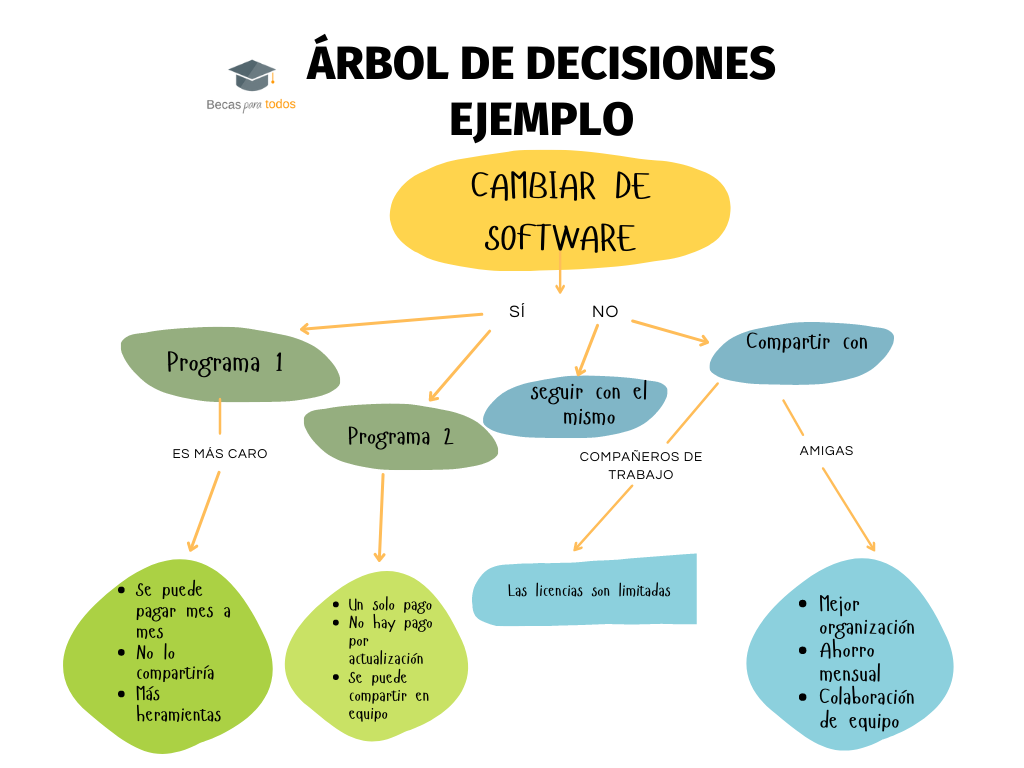

Árbol de Decisión -> R2: 0.508910 | MSE: 19009.468854 | RMSE: 137.874830 | MAE: 106.344865


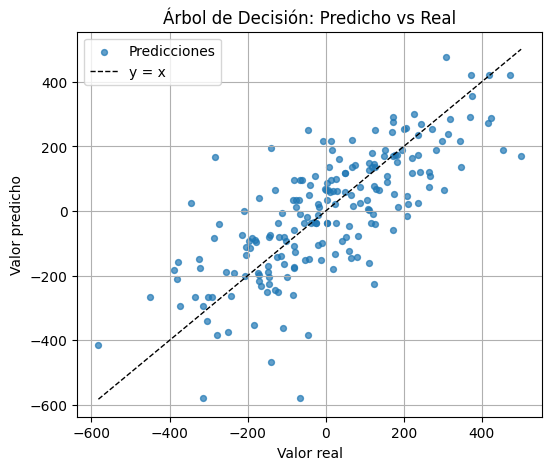

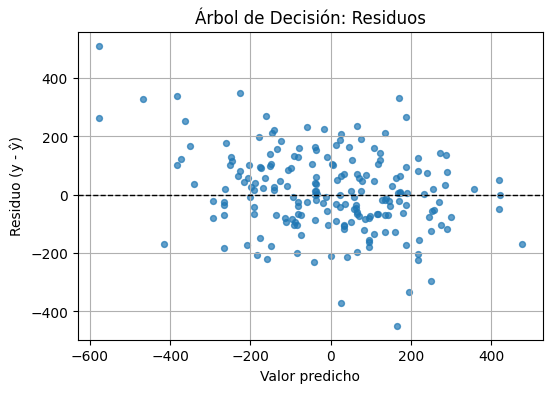

In [141]:
# === Modelo DecisionTreeRegressor con datos ya procesados ===
dt_model = DecisionTreeRegressor(random_state=42, max_depth=None)
dt_model.fit(X_train_processed, y_train)
y_pred_dt = dt_model.predict(X_test_processed)

evaluar_modelo(y_test, y_pred_dt, 'Árbol de Decisión')


### Validacion cruzada

In [144]:
from sklearn.model_selection import KFold, RepeatedKFold, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# --- Preprocesador (igual que antes) ---
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# --- Pipeline modelo ---
pipe_dt = Pipeline([
    ('prep', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42, max_depth=None))
])

# --- Definir métricas ---
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

# ======= CV simple: KFold (5 folds) =======
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_res = cross_validate(pipe_dt, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)

r2_mean, r2_std   = cv_res['test_r2'].mean(), cv_res['test_r2'].std()
mse_mean = -cv_res['test_mse'].mean(); rmse_mean = np.sqrt(mse_mean)
mae_mean = -cv_res['test_mae'].mean()

print(f"Árbol de Decisión (5-Fold CV) -> R²: {r2_mean:.4f} ± {r2_std:.4f} | "
      f"RMSE: {rmse_mean:.4f} | MAE: {mae_mean:.4f}")

Árbol de Decisión (5-Fold CV) -> R²: 0.4410 ± 0.0375 | RMSE: 145.2673 | MAE: 113.0354


### 3. Modelo 3: Bosque Aleatorio


El **bosque aleatorio** construye un conjunto de árboles de regresión entrenados sobre diferentes subconjuntos de datos y características (bagging). La predicción final es la media de las predicciones de todos los árboles, lo cual reduce la varianza y mejora la capacidad de generalización en comparación con un árbol único.

Se utiliza `RandomForestRegressor` de `scikit‑learn` con un número moderado de árboles, utilizando las características originales.

Bosque Aleatorio -> R2: 0.824185 | MSE: 6805.574530 | RMSE: 82.495906 | MAE: 65.487903


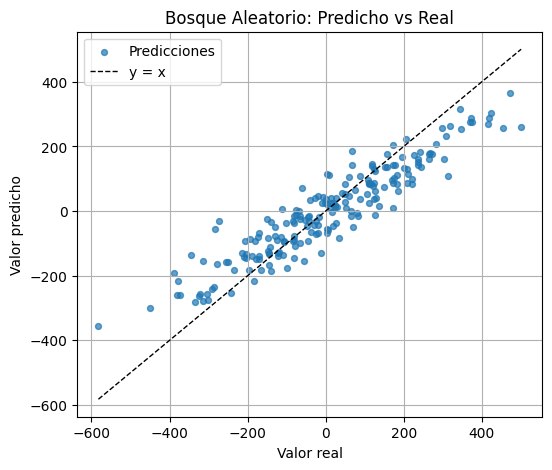

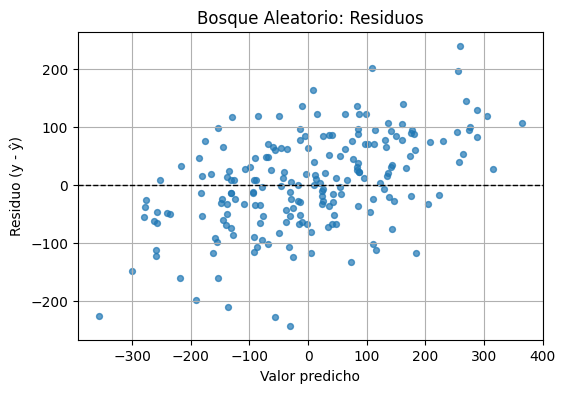

In [147]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el bosque aleatorio
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Predecir
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_rf, 'Bosque Aleatorio')


### 4. Modelo 4: Regresión SVR Lineal


La **regresión de soporte vectorial** (SVR) intenta encontrar una función que se desvíe de los valores reales en un margen ε lo más pequeño posible y que al mismo tiempo maximice el margen. En la variante con kernel lineal, se ajusta un hiperplano en el espacio de características.

SVR es sensible a la escala de los datos, por lo que se utilizan las variables estandarizadas.

En este ejemplo se entrena un `SVR` con kernel lineal para aproximar la relación entre las características y la variable objetivo.

SVR Lineal -> R2: 1.000000 | MSE: 0.018528 | RMSE: 0.136116 | MAE: 0.107415


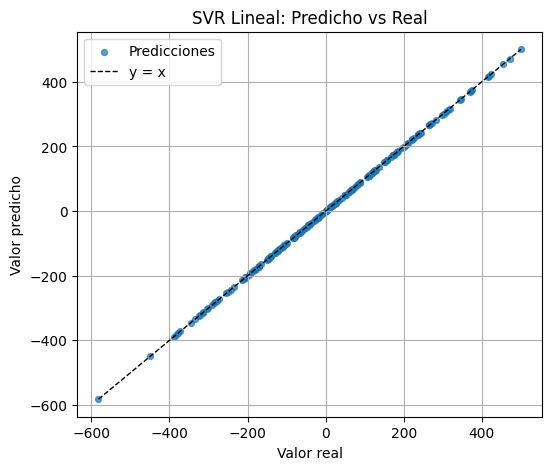

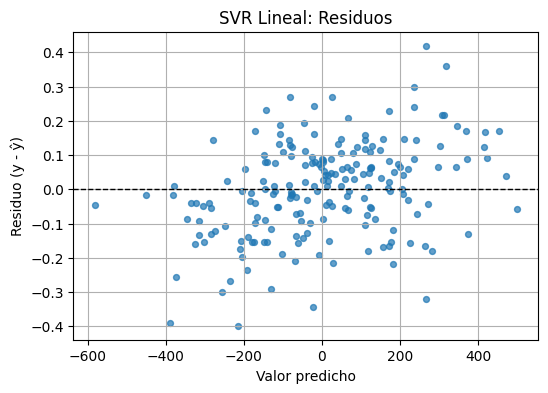

In [148]:

from sklearn.svm import SVR

# Crear y entrenar SVR lineal
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_processed, y_train)

# Predecir
y_pred_svr = svr_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_svr, 'SVR Lineal')


### 5. Modelo 5: XGBoost


**XGBoost** es un algoritmo de boosting de gradiente extremadamente eficiente y con regularización integrada. Construye árboles de decisión de manera secuencial, donde cada árbol nuevo corrige los errores cometidos por los anteriores. La función de pérdida regularizada evita el sobreajuste.

En este ejemplo se emplea `XGBRegressor` con una profundidad moderada y parámetros por defecto. Se utilizan las características originales (no es necesario el escalado para árboles).

XGBoost -> R2: 0.943756 | MSE: 2177.122757 | RMSE: 46.659648 | MAE: 37.164201


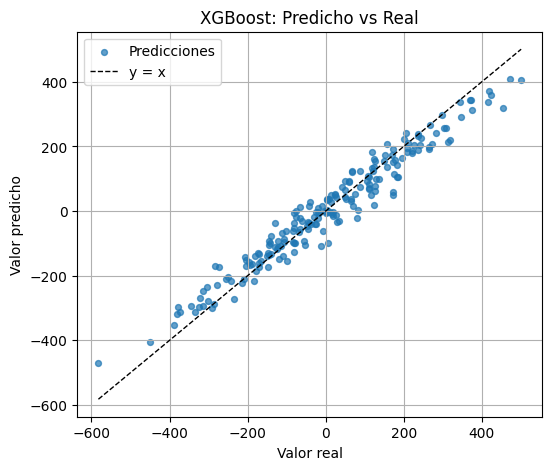

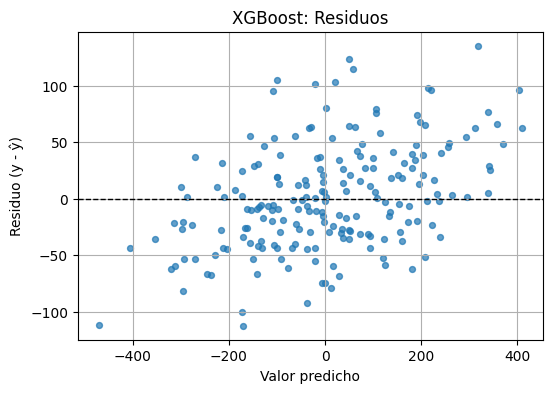

In [149]:

from xgboost import XGBRegressor

# Crear y entrenar XGBoost
xgb_model = XGBRegressor(n_estimators=300, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train_processed, y_train)

# Predecir
y_pred_xgb = xgb_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_xgb, 'XGBoost')


### 6. Modelo 6: AdaBoost


**AdaBoost** (Adaptive Boosting) combina varios modelos débiles (reglas de decisión simples) para construir un predictor más robusto. En regresión, cada modelo se entrena asignando pesos mayores a las observaciones con mayor error. La predicción final es la suma ponderada de los modelos débiles.

Se utiliza `AdaBoostRegressor` con árboles de decisión de profundidad 3 como estimadores base.

In [150]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Estimador base (árbol pequeño)
base_estimator = DecisionTreeRegressor(max_depth=3, random_state=42)

# Crear y entrenar AdaBoost
ada_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=200, learning_rate=0.05, random_state=42)
ada_model.fit(X_train_processed, y_train)

# Predecir
y_pred_ada = ada_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_ada, 'AdaBoost')


TypeError: AdaBoostRegressor.__init__() got an unexpected keyword argument 'base_estimator'

### 7. Modelo 7: Lasso


La **regresión Lasso** realiza ajuste lineal con regularización L1, incorporando un término λ⋅∑|β| a la función de pérdida. Este término favorece soluciones con coeficientes exactamente cero, lo que efectúa una selección de variables implícita.

Se ajusta un modelo `Lasso` sobre los datos estandarizados y se evalúa su rendimiento.

Lasso -> R2: 0.999997 | MSE: 0.115852 | RMSE: 0.340371 | MAE: 0.276718


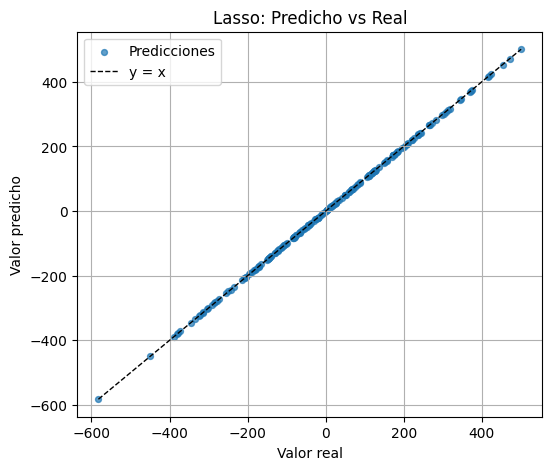

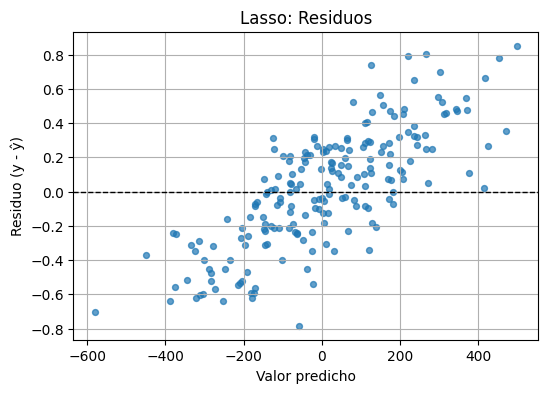

In [151]:

from sklearn.linear_model import Lasso

# Crear y entrenar Lasso (alpha controla la regularización)
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_processed, y_train)

# Predecir
y_pred_lasso = lasso_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_lasso, 'Lasso')


### 8. Modelo 8: Ridge


La **regresión Ridge** incorpora un término de regularización L2 (λ⋅∑β²) al error cuadrático medio. Este término penaliza valores grandes de los coeficientes, reduciendo la varianza y mejorando la estabilidad del modelo frente a multicolinealidad.

Se ajusta un modelo `Ridge` sobre los datos estandarizados y se calcula su rendimiento.

Ridge -> R2: 0.999996 | MSE: 0.156571 | RMSE: 0.395691 | MAE: 0.308373


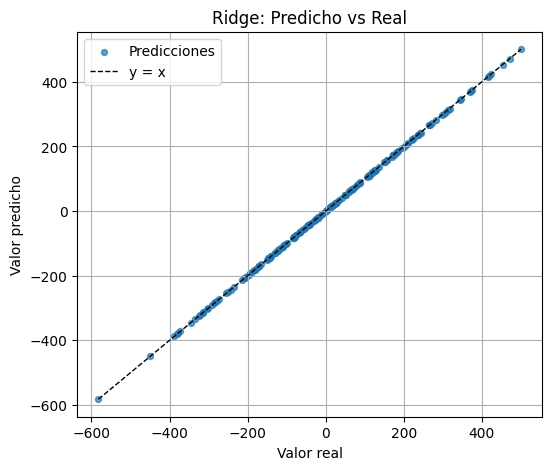

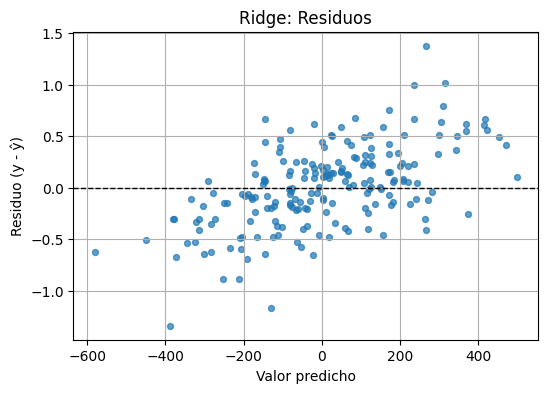

In [152]:

from sklearn.linear_model import Ridge

# Crear y entrenar Ridge
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_processed, y_train)

# Predecir
y_pred_ridge = ridge_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_ridge, 'Ridge')


### 9. Modelo 9: MLP


El **perceptrón multicapa** (MLP) es una red neuronal de alimentación hacia adelante compuesta por capas ocultas de neuronas. En problemas de regresión, la capa de salida tiene activación lineal y la red puede capturar relaciones no lineales entre variables.

Se utiliza `MLPRegressor` con una capa oculta de 100 neuronas y activación ReLU. El modelo requiere datos estandarizados para un entrenamiento estable.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP -> R2: 0.995986 | MSE: 155.369055 | RMSE: 12.464712 | MAE: 5.449475


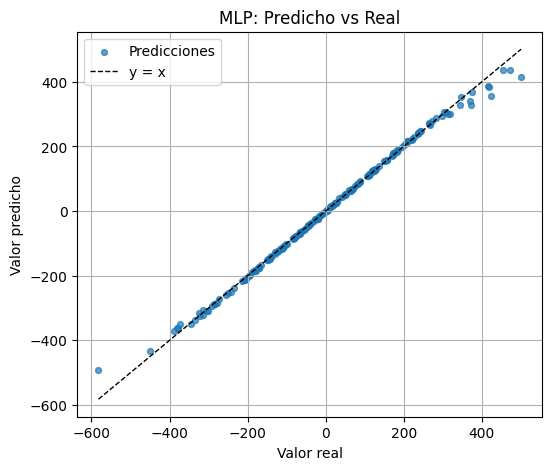

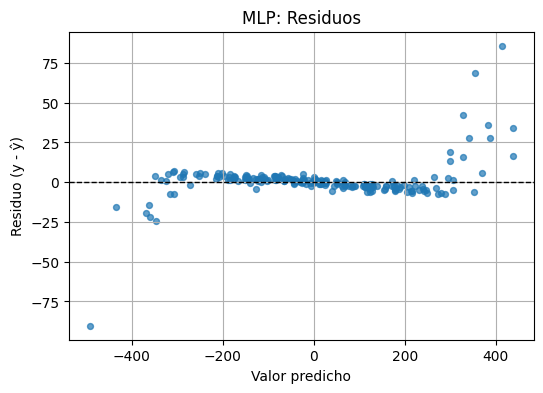

In [153]:

from sklearn.neural_network import MLPRegressor

# Crear y entrenar MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train_processed, y_train)

# Predecir
y_pred_mlp = mlp_model.predict(X_test_processed)

# Evaluar
evaluar_modelo(y_test, y_pred_mlp, 'MLP')


## **Busqueda de Hiperparametros**

## ¿En qué consiste el ajuste de hiperparámetros?

Cuando se entrenan modelos de machine learning, cada conjunto de datos y cada modelo necesitan un conjunto diferente de hiperparámetros, que son un tipo de variables. La única forma de determinarlos es mediante la realización de múltiples experimentos, en los que se elige un conjunto de hiperparámetros y se los ejecuta a través del modelo. Esto se denomina ajuste de hiperparámetros. Básicamente, está entrenando su modelo secuencialmente con diferentes conjuntos de hiperparámetros. Este proceso puede ser manual o puede elegir uno de los distintos métodos automatizados de ajuste de hiperparámetros.

Sea cual sea el método que utilice, debe hacer un seguimiento de los resultados de los experimentos. Tendrá que aplicar algún tipo de análisis estadístico, como la función de pérdida, para determinar qué conjunto de hiperparámetros da el mejor resultado. El ajuste de hiperparámetros es un proceso importante e intensivo desde el punto de vista computacional.

## ¿Qué son los hiperparámetros?

Los hiperparámetros son variables de configuración externa que los científicos de datos utilizan para administrar el entrenamiento de modelos de machine learning. A veces llamados hiperparámetros de modelos, los hiperparámetros se configuran de manera manual antes de entrenar un modelo. Son diferentes de los parámetros, que son elementos internos derivados de manera automática durante el proceso de aprendizaje y que no están configurados por científicos de datos.

Entre los ejemplos de hiperparámetros se incluyen el número de nodos y capas de una red neuronal y el número de ramificaciones de un árbol de decisiones. Los hiperparámetros determinan características clave como la arquitectura del modelo, la tasa de aprendizaje y la complejidad del modelo.

## ¿Por qué es importante el ajuste de hiperparámetros?

Los hiperparámetros controlan de forma directa la estructura, funciones y rendimiento de los modelos. El ajuste de hiperparámetros permite a los científicos de datos modificar el rendimiento del modelo para lograr resultados óptimos. Este proceso es una parte fundamental del machine learning, y elegir los valores de hiperparámetros apropiados es fundamental para lograr el éxito.

Por ejemplo, pongamos que utiliza la tasa de aprendizaje del modo como hiperparámetro. Si el valor es demasiado alto, es posible que el modelo converja demasiado rápido con resultados subóptimos. Por el contrario, si el valor es muy bajo, el entrenamiento se demora demasiado y es posible que los resultados no converjan. Una elección correcta y equilibrada de hiperparámetros da lugar a modelos precisos y con un rendimiento excelente.

https://aws.amazon.com/es/what-is/hyperparameter-tuning/

In [ ]:
# ====== Utilidades comunes ======
from sklearn.model_selection import RepeatedKFold, KFold, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def evaluar_holdout(nombre, estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{nombre:<22} | Hold-out -> R²: {r2:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f}")
    return r2, rmse, mae

def cv_score(estimator, X, y, cv, scoring='r2'):
    scores = cross_validate(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    return scores['test_score'].mean(), scores['test_score'].std()

# CV: 5-fold estratificado no aplica a regresión; usamos KFold/RepeatedKFold
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
rcv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# ====== Modelos ======
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Cada modelo va en un Pipeline con el mismo preprocessor
def pipe(model):
    return Pipeline([('prep', preprocessor), ('model', model)])

# ====== Espacios de búsqueda ======
# Nota: prefijo 'model__' porque el estimador está bajo el paso 'model' del Pipeline.

param_grids = {
    # LinearRegression no tiene hiperparámetros útiles en sklearn -> solo evaluar
    'LinearRegression': {},

    'DecisionTree': {
        'model__max_depth': [None, 3, 5, 8, 12, 20],
        'model__min_samples_split': [2, 5, 10, 20],
        'model__min_samples_leaf': [1, 2, 5, 10],
        'model__max_features': [None, 'sqrt', 'log2']
    },

    'RandomForest': {
        'model__n_estimators': [200, 400, 600, 800],
        'model__max_depth': [None, 5, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__max_features': ['sqrt', 'log2', 0.5, 0.7, 1.0],
        'model__bootstrap': [True]
    },

    'SVR_linear_kernel': {
        'model__kernel': ['linear'],
        'model__C': np.logspace(-2, 3, 10),
        'model__epsilon': np.logspace(-3, 0, 8)
    },

    'LinearSVR': {
        'model__C': np.logspace(-2, 3, 10),
        'model__epsilon': np.logspace(-3, 0, 8),
        'model__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
        'model__max_iter': [5000, 10000]
    },

    'XGBRegressor': {
        'model__n_estimators': [300, 600, 900],
        'model__max_depth': [3, 5, 7, 9],
        'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'model__subsample': [0.6, 0.8, 1.0],
        'model__colsample_bytree': [0.6, 0.8, 1.0],
        'model__reg_alpha': [0, 0.001, 0.01, 0.1, 1.0],
        'model__reg_lambda': [0.1, 1.0, 5.0, 10.0]
    },

    'AdaBoost': {
        # si usas árbol base poco profundo:
        'model__n_estimators': [100, 200, 400, 800],
        'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'model__loss': ['linear', 'square', 'exponential'],
        'model__estimator__max_depth': [2, 3, 4, 5],
        'model__estimator__min_samples_leaf': [1, 2, 5]
    },

    'Lasso': {
        'model__alpha': np.logspace(-4, 1, 12),
        'model__max_iter': [5000, 10000]
    },

    'Ridge': {
        'model__alpha': np.logspace(-4, 3, 12)
    },

    'MLP': {
        'model__hidden_layer_sizes': [(64,), (128,), (64,32), (128,64), (128,64,32)],
        'model__activation': ['relu', 'tanh'],
        'model__alpha': np.logspace(-6, -2, 5),           # L2 regularization
        'model__learning_rate_init': [1e-4, 5e-4, 1e-3],
        'model__batch_size': [32, 64, 128],
        'model__max_iter': [800, 1200]
    }
}

# ====== Definición de estimadores base ======
estimators = {
    'LinearRegression': pipe(LinearRegression()),
    'DecisionTree': pipe(DecisionTreeRegressor(random_state=42)),
    'RandomForest': pipe(RandomForestRegressor(random_state=42, n_jobs=-1)),
    'SVR_linear_kernel': pipe(SVR()),
    'LinearSVR': pipe(LinearSVR(random_state=42)),
    'XGBRegressor': pipe(XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,
        tree_method='hist'  # rápido por defecto; si tienes GPU: 'gpu_hist'
    )),
    'AdaBoost': pipe(AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=3, random_state=42),
        random_state=42
    )),
    'Lasso': pipe(Lasso(random_state=42, max_iter=5000)),
    'Ridge': pipe(Ridge(random_state=42)),
    'MLP': pipe(MLPRegressor(random_state=42))
}

# ====== Función de búsqueda ======
def buscar_mejores(model_key, X, y, cv=cv5, scoring='r2', use_random=True, n_iter=40):
    model = estimators[model_key]
    grid = param_grids[model_key]
    if len(grid) == 0:
        # Sin hiperparámetros (LinearRegression): devolvemos el modelo tal cual
        mean_r2, std_r2 = cv_score(model, X, y, cv=cv, scoring=scoring)
        print(f"[{model_key}] sin hiperparámetros: CV R² = {mean_r2:.4f} ± {std_r2:.4f}")
        model.fit(X_train, y_train)
        return model
    # Grid pequeño -> GridSearch; Grid grande -> Randomized
    if use_random:
        searcher = RandomizedSearchCV(
            estimator=model, param_distributions=grid, n_iter=n_iter,
            scoring=scoring, cv=cv, n_jobs=-1, random_state=42, verbose=1
        )
    else:
        searcher = GridSearchCV(
            estimator=model, param_grid=grid, scoring=scoring,
            cv=cv, n_jobs=-1, verbose=1
        )
    searcher.fit(X, y)
    print(f"[{model_key}] Mejor CV {scoring}: {searcher.best_score_:.4f}")
    print(f"[{model_key}] Mejores params: {searcher.best_params_}")
    best_est = searcher.best_estimator_
    # Evaluación hold-out final
    evaluar_holdout(model_key + " (best)", best_est, X_train, y_train, X_test, y_test)
    return best_est

# ====== Ejecutar búsquedas ======
best_lr   = buscar_mejores('LinearRegression', X, y)                 # solo evalúa
best_dt   = buscar_mejores('DecisionTree', X, y, n_iter=60)
best_rf   = buscar_mejores('RandomForest', X, y, n_iter=60)
best_svr  = buscar_mejores('SVR_linear_kernel', X, y, n_iter=50)
best_lsvr = buscar_mejores('LinearSVR', X, y, n_iter=60)
best_xgb  = buscar_mejores('XGBRegressor', X, y, n_iter=60)
best_ada  = buscar_mejores('AdaBoost', X, y, n_iter=60)
best_lasso= buscar_mejores('Lasso', X, y, use_random=False)          # Grid pequeño
best_ridge= buscar_mejores('Ridge', X, y, use_random=False)          # Grid pequeño
best_mlp  = buscar_mejores('MLP', X, y, n_iter=60)


[LinearRegression] sin hiperparámetros: CV R² = 1.0000 ± 0.0000
Fitting 5 folds for each of 60 candidates, totalling 300 fits
[DecisionTree] Mejor CV r2: 0.5409
[DecisionTree] Mejores params: {'model__min_samples_split': 10, 'model__min_samples_leaf': 10, 'model__max_features': None, 'model__max_depth': 20}
DecisionTree (best)    | Hold-out -> R²: 0.5064 | RMSE: 138.2203 | MAE: 109.8201
Fitting 5 folds for each of 60 candidates, totalling 300 fits
